In [137]:
#Read data 
import pandas as pd
df = pd.read_csv('/Users/jigyasasachdeva/Desktop/zillow_listing.csv')

In [138]:
#Display first few rows
df.head()

,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,price
0,5850,3,1,2,yes,no,yes,no,no,1,no,161700.0
1,4000,2,1,1,yes,no,no,no,no,0,no,148225.0
2,3060,3,1,1,yes,no,no,no,no,0,no,190575.0
3,6650,3,1,2,yes,yes,no,no,no,0,no,232925.0
4,6360,2,1,1,yes,no,no,no,no,0,no,234850.0


In [139]:
#Dummy coding the categorical variables
df['driveway'] = df['driveway'].replace(['no','yes'],[0,1]) #Replacing no with 0 and yes with 1
df['recroom'] = df['recroom'].replace(['no','yes'],[0,1])
df['fullbase'] = df['fullbase'].replace(['no','yes'],[0,1])
df['gashw'] = df['gashw'].replace(['no','yes'],[0,1])
df['airco'] = df['airco'].replace(['no','yes'],[0,1])
df['prefarea'] = df['prefarea'].replace(['no','yes'],[0,1])

In [140]:
#Revisiting changed data frame
df.head()

,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,price
0,5850,3,1,2,1,0,1,0,0,1,0,161700.0
1,4000,2,1,1,1,0,0,0,0,0,0,148225.0
2,3060,3,1,1,1,0,0,0,0,0,0,190575.0
3,6650,3,1,2,1,1,0,0,0,0,0,232925.0
4,6360,2,1,1,1,0,0,0,0,0,0,234850.0


In [141]:
#Evaluating data types
df.dtypes

lotsize       int64
bedrooms      int64
bathrms       int64
stories       int64
driveway      int64
recroom       int64
fullbase      int64
gashw         int64
airco         int64
garagepl      int64
prefarea      int64
price       float64
dtype: object

In [142]:
#As established, converting the following into categorical variables
df['recroom'] = df['recroom'].astype('category')
df['driveway'] = df['driveway'].astype('category')
df['gashw'] = df['gashw'].astype('category')
df['airco'] = df['airco'].astype('category')
df['fullbase'] = df['fullbase'].astype('category')
df['prefarea'] = df['prefarea'].astype('category')
df.dtypes

lotsize        int64
bedrooms       int64
bathrms        int64
stories        int64
driveway    category
recroom     category
fullbase    category
gashw       category
airco       category
garagepl       int64
prefarea    category
price        float64
dtype: object

In [143]:
#One hot encoding of the data frame 
import pandas as pd

#Creating dummies of each categorical variable
dw = pd.get_dummies(df.driveway, prefix='Driveway')
rr = pd.get_dummies(df.recroom, prefix='Recroom')
fb = pd.get_dummies(df.fullbase, prefix='Fullbase')
gh = pd.get_dummies(df.gashw, prefix='Gashw')
ac = pd.get_dummies(df.airco, prefix='Airco')
pa = pd.get_dummies(df.prefarea, prefix='Prefarea')
#Numerical variables in 1 data frame
num = df[['lotsize', 'bedrooms', 'bathrms', 'stories', 'garagepl', 'price']]

#Concatenating all the dummy vectors and numerical dataframe
encoded_df = pd.concat([dw, rr, fb, gh, ac, pa, num],axis=1)
encoded_df

,Driveway_0,Driveway_1,Recroom_0,Recroom_1,Fullbase_0,Fullbase_1,Gashw_0,Gashw_1,Airco_0,Airco_1,Prefarea_0,Prefarea_1,lotsize,bedrooms,bathrms,stories,garagepl,price
0,0,1,1,0,0,1,1,0,1,0,1,0,5850,3,1,2,1,161700.0
1,0,1,1,0,1,0,1,0,1,0,1,0,4000,2,1,1,0,148225.0
2,0,1,1,0,1,0,1,0,1,0,1,0,3060,3,1,1,0,190575.0
3,0,1,0,1,1,0,1,0,1,0,1,0,6650,3,1,2,0,232925.0
4,0,1,1,0,1,0,1,0,1,0,1,0,6360,2,1,1,0,234850.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,1,1,0,0,1,1,0,1,0,1,0,5985,3,1,1,0,227150.0
496,0,1,1,0,0,1,1,0,1,0,1,0,4500,3,1,1,0,231000.0
497,0,1,1,0,1,0,1,0,1,0,1,0,4920,3,1,2,1,242165.0
498,0,1,1,0,1,0,1,0,1,0,1,0,8250,3,1,1,0,246400.0


In [144]:
#Using sklearn's train test split, splitting the data
from sklearn.model_selection import train_test_split
X = encoded_df.drop('price', axis = 1)
y = encoded_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [145]:
#Checking the dimensions of train data
X_train.shape

(350, 17)

In [146]:
#Checking the dimensions of test data
X_test.shape

(150, 17)

In [147]:
#Model 1

#Running linear regression
from sklearn.linear_model import LinearRegression
#Fitting the data on train data
reg = LinearRegression().fit(X_train, y_train)
#Calculating R square
reg.score(X_train, y_train)

0.6789083279797596

In [148]:
import numpy as np
#Coefficients of encoded data
np.set_printoptions(suppress=True) #Remove scientific notations
coeff_df = pd.DataFrame(reg.coef_, X_train.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Driveway_0,-15126.892511
Driveway_1,15126.892511
Recroom_0,-10721.612927
Recroom_1,10721.612927
Fullbase_0,-11499.401464
Fullbase_1,11499.401464
Gashw_0,-36479.217700
Gashw_1,36479.217700
Airco_0,-24640.543936
Airco_1,24640.543936


In [149]:
#Intercept value
reg.intercept_

94632.61833108871

In [150]:
#Predicting the data
y_pred = reg.predict(X_test)

In [151]:
#Comparing predictions and actual values
actual_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
actual_pred

,Actual,Predicted
361,558250.0,522615.365963
73,130900.0,169950.026764
374,487025.0,371161.239392
155,231000.0,253197.381006
104,223300.0,283133.713188
...,...,...
266,202125.0,147497.250766
23,146300.0,155351.210050
222,269885.0,207218.407848
261,177870.0,218179.418032


In [152]:
#Displaying evaluation metrics for linear regression model
from sklearn import metrics

print('Mean Absolute Error of linear regression model:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error of linear regression model:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
errors = abs(y_pred - y_test)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy of linear regression model:', round(accuracy, 2), '%.')

Mean Absolute Error of linear regression model: 47537.842255472526
Root Mean Squared Error of linear regression model: 65870.48790381491
Accuracy of linear regression model: 80.6 %.


In [153]:
#Correlation plot
from statsmodels.graphics.correlation import plot_corr
corr = X.corr()
corr

,Driveway_0,Driveway_1,Recroom_0,Recroom_1,Fullbase_0,Fullbase_1,Gashw_0,Gashw_1,Airco_0,Airco_1,Prefarea_0,Prefarea_1,lotsize,bedrooms,bathrms,stories,garagepl
Driveway_0,1.000000,-1.000000,0.087976,-0.087976,0.061308,-0.061308,-0.012114,0.012114,0.086102,-0.086102,0.224877,-0.224877,-0.280646,0.023402,-0.025992,-0.096013,-0.207683
Driveway_1,-1.000000,1.000000,-0.087976,0.087976,-0.061308,0.061308,0.012114,-0.012114,-0.086102,0.086102,-0.224877,0.224877,0.280646,-0.023402,0.025992,0.096013,0.207683
Recroom_0,0.087976,-0.087976,1.000000,-1.000000,0.400308,-0.400308,-0.022063,0.022063,0.153611,-0.153611,0.189945,-0.189945,-0.137121,-0.082534,-0.105893,-0.031174,-0.037653
Recroom_1,-0.087976,0.087976,-1.000000,1.000000,-0.400308,0.400308,0.022063,-0.022063,-0.153611,0.153611,-0.189945,0.189945,0.137121,0.082534,0.105893,0.031174,0.037653
Fullbase_0,0.061308,-0.061308,0.400308,-0.400308,1.000000,-1.000000,-0.009186,0.009186,0.113578,-0.113578,0.217571,-0.217571,-0.072848,-0.127212,-0.153956,0.120196,-0.068767
Fullbase_1,-0.061308,0.061308,-0.400308,0.400308,-1.000000,1.000000,0.009186,-0.009186,-0.113578,0.113578,-0.217571,0.217571,0.072848,0.127212,0.153956,-0.120196,0.068767
Gashw_0,-0.012114,0.012114,-0.022063,0.022063,-0.009186,0.009186,1.000000,-1.000000,-0.117848,0.117848,-0.063178,0.063178,0.003284,-0.066932,-0.094801,-0.066961,-0.093400
Gashw_1,0.012114,-0.012114,0.022063,-0.022063,0.009186,-0.009186,-1.000000,1.000000,0.117848,-0.117848,0.063178,-0.063178,-0.003284,0.066932,0.094801,0.066961,0.093400
Airco_0,0.086102,-0.086102,0.153611,-0.153611,0.113578,-0.113578,-0.117848,0.117848,1.000000,-1.000000,0.166235,-0.166235,-0.212835,-0.146333,-0.153816,-0.194238,-0.154762
Airco_1,-0.086102,0.086102,-0.153611,0.153611,-0.113578,0.113578,0.117848,-0.117848,-1.000000,1.000000,-0.166235,0.166235,0.212835,0.146333,0.153816,0.194238,0.154762


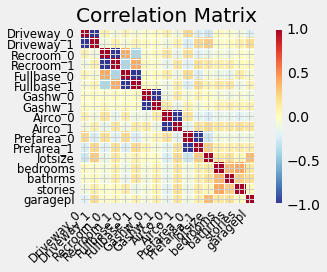

In [154]:
#Correlation matrix
from statsmodels.graphics.correlation import plot_corr
fig=plot_corr(corr,xnames=corr.columns)

In [155]:
#Model 2

#Random Forest with 1000 trees
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [156]:
#Predictions on the test data
predictions = rf.predict(X_test)
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error of random forest regressor is:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error of random forest regressor is: 47944.03 degrees.


In [157]:
#Metrics evaluation
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy of random forest regressor is:', round(accuracy, 2), '%.')

Accuracy of random forest regressor is: 80.8 %.


In [158]:
#Checking which features are important
importances = list(rf.feature_importances_)
feature_list = list(X.columns.values) 
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: lotsize              Importance: 0.45
Variable: bathrms              Importance: 0.16
Variable: bedrooms             Importance: 0.06
Variable: garagepl             Importance: 0.06
Variable: stories              Importance: 0.05
Variable: Fullbase_0           Importance: 0.03
Variable: Fullbase_1           Importance: 0.03
Variable: Airco_0              Importance: 0.03
Variable: Airco_1              Importance: 0.03
Variable: Gashw_0              Importance: 0.02
Variable: Gashw_1              Importance: 0.02
Variable: Prefarea_0           Importance: 0.02
Variable: Prefarea_1           Importance: 0.02
Variable: Driveway_0           Importance: 0.01
Variable: Driveway_1           Importance: 0.01
Variable: Recroom_0            Importance: 0.01
Variable: Recroom_1            Importance: 0.01


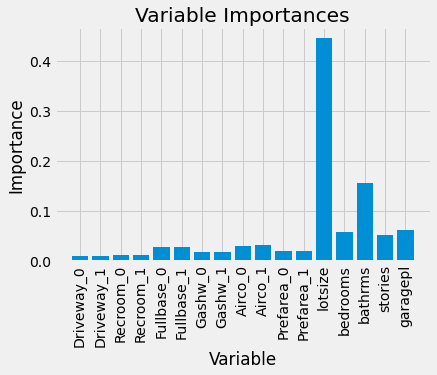

In [159]:
#Plotting variable importance
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [160]:
#Scaling the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

In [161]:
#Model 3

#K Nearest Neighbors
knn = KNeighborsRegressor(n_neighbors = 3) #setting up the KNN model to use 5NN
knn.fit(X_train_scaled, y_train) #fitting the KNN

KNeighborsRegressor(n_neighbors=3)

In [162]:
#Metrics: 
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
#Checking performance on the test set
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

Accuracy of K-NN classifier on training set: 0.76
Accuracy of K-NN classifier on test set: 0.50


In [164]:
#Model 4

#Lasso Regression
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha= 0.05)
lasso_reg.fit(X, y)

Lasso(alpha=0.05)

In [165]:
#Coefficients
print(lasso_reg.coef_)

[-24409.40808615      0.         -16813.53394569      0.
 -22918.7643637       0.         -51361.15885068      0.
 -46908.35492088      0.         -36703.48673715      0.
     14.16062912   8007.49023737  55048.825448    24095.27838134
  16055.31077508]


In [166]:
#Intercept
print(lasso_reg.intercept_)

180607.2642943912


In [170]:
#Test error computation
y_pred = lasso_reg.predict(X_test)
errors = abs(y_pred - y_test)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)

In [171]:
accuracy

80.89643874780093

In [172]:
#Statistical model 
#OLS 


import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.nonparametric.smoothers_lowess import lowess
import numpy as np
np.set_printoptions(suppress=True)

y = df['price']
X = df.drop('price', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

model = smf.ols(formula='y_train ~ lotsize + bedrooms + bathrms + stories + driveway + recroom + fullbase + gashw + airco + garagepl + prefarea', data=X_train)
results = model.fit()
print(results.summary())

#Removing variables: 
model1 = smf.ols(formula='y_train ~ bedrooms + bathrms+ driveway + recroom + fullbase + gashw + airco + garagepl + prefarea', data=X_train)
results1 = model1.fit()
print(results1.summary())

#Since there is strong multi colinearity
#Stories and bedrooms have the maximum
#Followed by bedrooms and bathrooms
#Followed by stories and bathrooms

                            OLS Regression Results                            
Dep. Variable:                y_train   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     64.97
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           1.61e-76
Time:                        03:35:32   Log-Likelihood:                -4328.2
No. Observations:                 350   AIC:                             8680.
Df Residuals:                     338   BIC:                             8727.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.114e+04    1.6e+04     -1.319